# Exploratory Data Analysis

## Importing modules

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

## Load data

In [4]:
data = pd.read_csv('../Data/final_train.csv')
data.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id
0,59383,2021-08-01 00:04:37,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,19,80.316334,40.239252
1,59384,2021-08-01 00:12:10,6,429,8.61,0,11.827443,63.992102,18.618562,9.309281,3.778676,16,15.172487,63.912685
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,75.221083,94.991427,82.620413,41.310207,3.723765,13,74.196424,98.288079
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.122179,8.329098,9.852171,4.926085,3.862067,15,51.950635,6.563484
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.777887,31.405270,83.660035,41.830018,3.128315,20,62.417972,26.483666


## Basic info about the data

In [5]:
data.shape

(291231, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291231 entries, 0 to 291230
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TRANSACTION_ID      291231 non-null  int64  
 1   TX_DATETIME         291231 non-null  object 
 2   CUSTOMER_ID         291231 non-null  int64  
 3   TERMINAL_ID         291231 non-null  int64  
 4   TX_AMOUNT           291231 non-null  float64
 5   TX_FRAUD            291231 non-null  int64  
 6   x_customer_id       291231 non-null  float64
 7   y_customer_id       291231 non-null  float64
 8   mean_amount         291231 non-null  float64
 9   std_amount          291231 non-null  float64
 10  mean_nb_tx_per_day  291231 non-null  float64
 11  nb_terminals        291231 non-null  int64  
 12  x_terminal_id       291231 non-null  float64
 13  y_terminal_id       291231 non-null  float64
dtypes: float64(8), int64(5), object(1)
memory usage: 31.1+ MB


In [9]:
data.isnull().sum()

TRANSACTION_ID        0
TX_DATETIME           0
CUSTOMER_ID           0
TERMINAL_ID           0
TX_AMOUNT             0
TX_FRAUD              0
x_customer_id         0
y_customer_id         0
mean_amount           0
std_amount            0
mean_nb_tx_per_day    0
nb_terminals          0
x_terminal_id         0
y_terminal_id         0
dtype: int64

In [10]:
data.duplicated().sum()

0

**Insight**:
- There are no duplicate in data.
- There are no null values
- All columns are numerical data type except date time

## Checking target variable

In [12]:
data['TX_FRAUD'].value_counts()

TX_FRAUD
0    284649
1      6582
Name: count, dtype: int64

**Insight**: 
- Data is imbalance
- Only, 2.26% data are of fraud transaction, while 97.74% transaction are clean.

<Axes: ylabel='count'>

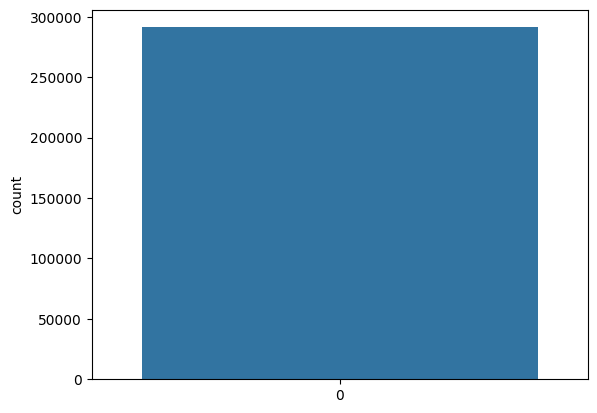

In [21]:
sns.countplot(data['TX_FRAUD'])

## Vizualization

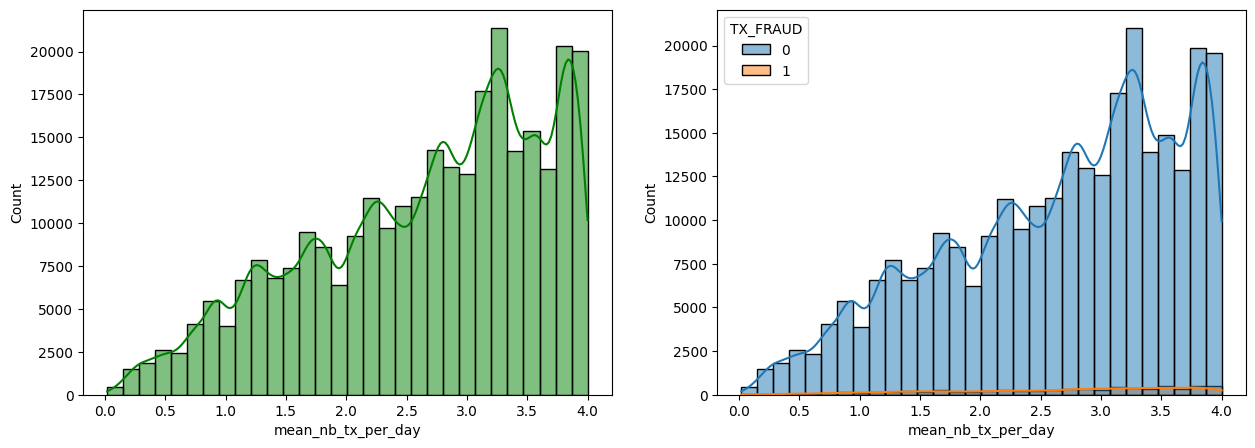

In [18]:
## kde for mean transaction per day
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data= data, x= 'mean_nb_tx_per_day', bins= 30, kde= True, color='green')
plt.subplot(1, 2, 2)
sns.histplot(data= data, x= 'mean_nb_tx_per_day', bins= 30, kde= True, hue= 'TX_FRAUD')
plt.show()

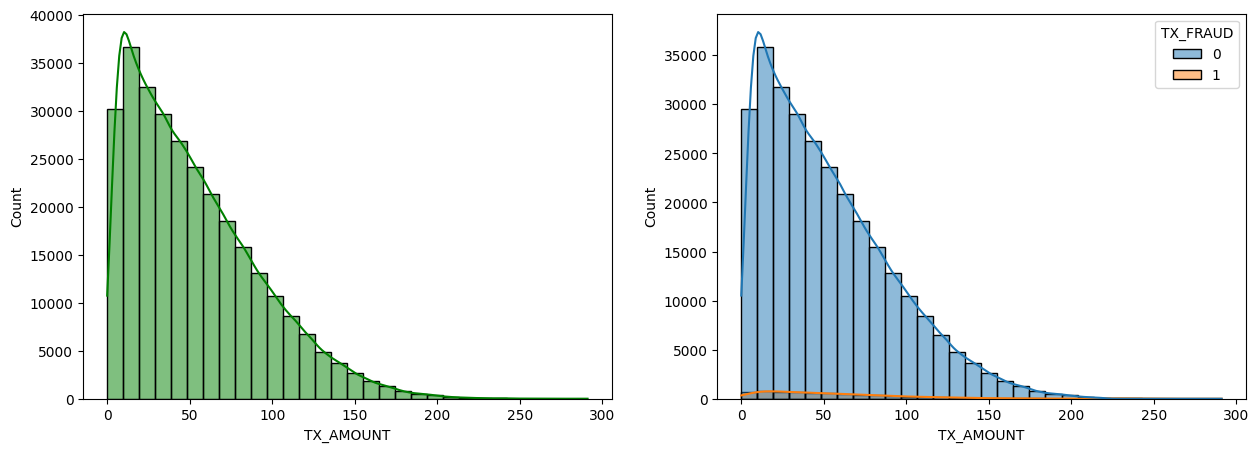

In [19]:
## kde for Transaction amount
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data= data, x= 'TX_AMOUNT', bins= 30, kde= True, color='green')
plt.subplot(1, 2, 2)
sns.histplot(data= data, x= 'TX_AMOUNT', bins= 30, kde= True, hue= 'TX_FRAUD')
plt.show()

**Insight**:
- The bigger the 

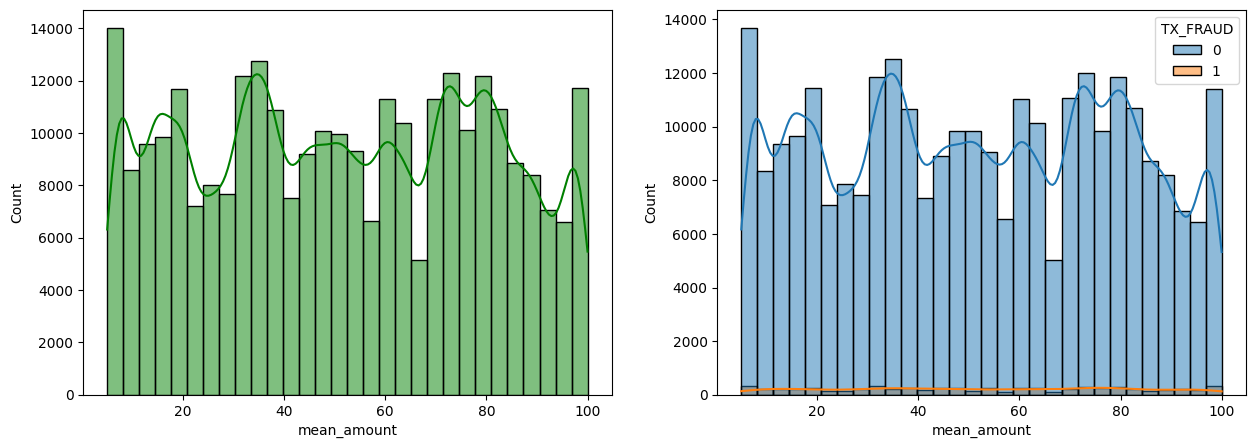

In [20]:
## kde for mean transaction per day
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data= data, x= 'mean_amount', bins= 30, kde= True, color='green')
plt.subplot(1, 2, 2)
sns.histplot(data= data, x= 'mean_amount', bins= 30, kde= True, hue= 'TX_FRAUD')
plt.show()